In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",None)
sns.set(style="whitegrid")


### Analisis exploratorio datos

In [3]:
df = pd.read_csv("path_a_los_datos" , sep = "|")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967340 entries, 0 to 967339
Columns: 216 entries, SUSCRIBER_KEY to PACK_DATA_EXP_W12
dtypes: float64(103), int64(98), object(15)
memory usage: 1.6+ GB


In [5]:
#Tipo de dato de las columnas
pd.set_option("display.max_rows",None)
print(df.dtypes)
pd.set_option("display.max_rows",20)

SUSCRIBER_KEY                    object
FECHA_CORTE                      object
MSISDN                            int64
LAT_PROV_BTS                    float64
LON_PROV_BTS                    float64
LAT_CITY_BTS                    float64
LON_CITY_BTS                    float64
PROV_SIT_BTS                     object
CITY_SIT_BTS                     object
COUNTY_SIT_BTS                   object
VALUE_SEGMENT                    object
SEGMENTATION                     object
MICROSEGMENTATION                object
SOURCE                           object
DEVICE_MODEL_NAME                object
DEVICE_VENDOR_NAME               object
NETWORK_TECH                     object
COMMERCIAL_ACTIVATION_DATE       object
TENURE_CUSTOMER                   int64
TENURE_CUSTOMER_BL                int64
PREP_RECH_Q_EVT_X1                int64
PREP_RECH_Q_EVT_X2                int64
PREP_RECH_Q_EVT_X3                int64
PREP_RECH_AMT_X1                float64
PREP_RECH_AMT_X2                float64


In [6]:
df.head(5)

,SUSCRIBER_KEY,FECHA_CORTE,MSISDN,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,PROV_SIT_BTS,CITY_SIT_BTS,COUNTY_SIT_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,EXPDTR_DATA_ARPU_AMT_M1,EXPDTR_DATA_ARPU_AMT_M2,EXPDTR_DATA_ARPU_AMT_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRD_OTH_M1,TRD_OTH_M2,TRD_OTH_M3,TRS_ONNET_SMS_M1,TRS_ONNET_SMS_M2,TRS_ONNET_SMS_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,SMS_OFFNET_EXP_ARPU_AMT_M1,SMS_OFFNET_EXP_ARPU_AMT_M2,SMS_OFFNET_EXP_ARPU_AMT_M3,SMS_ONNET_EXP_ARPU_AMT_M1,SMS_ONNET_EXP_ARPU_AMT_M2,SMS_ONNET_EXP_ARPU_AMT_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,SPNDG_VOI_ONNET_ARPU_M1,SPNDG_VOI_ONNET_ARPU_M2,SPNDG_VOI_ONNET_ARPU_M3,SPNDG_VOI_OFFNET_ARPU_M1,SPNDG_VOI_OFFNET_ARPU_M2,SPNDG_VOI_OFFNET_ARPU_M3,USE_LCL_VOI_AMT_M1,USE_LCL_VOI_AMT_M2,USE_LCL_VOI_AMT_M3,SPNDG_VOI_INTRNTL_ARPU_M1,SPNDG_VOI_INTRNTL_ARPU_M2,SPNDG_VOI_INTRNTL_ARPU_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_AMT_X1,PACK_VOICE_AMT_X2,PACK_VOICE_AMT_X3,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12,PACK_DATA_AMT_W1,PACK_DATA_AMT_W2,PACK_DATA_AMT_W3,PACK_DATA_AMT_W4,PACK_DATA_AMT_W5,PACK_DATA_AMT_W6,PACK_DATA_AMT_W7,PACK_DATA_AMT_W8,PACK_DATA_AMT_W9,PACK_DATA_AMT_W10,PACK_DATA_AMT_W11,PACK_DATA_AMT_W12,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12,PACK_VOICE_AMT_W1,PACK_VOICE_AMT_W2,PACK_VOICE_AMT_W3,PACK_VOICE_AMT_W4,PACK_VOICE_AMT_W5,PACK_VOICE_AMT_W6,PACK_VOICE_AMT_W7,PACK_VOICE_AMT_W8,PACK_VOICE_AMT_W9,PACK_VOICE_AMT_W10,PACK_VOICE_AMT_W11,PACK_VOICE_AMT_W12,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12,PACK_DATA_EXP_W1,PACK_DATA_EXP_W2,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12
0,CW_DPRE_67773005_20190427,08-SEP-19,67773005,9.41650,-82.52070,-82.52000,9.43000,BOCAS DEL TORO,CHANGUINOLA,GUABITO,2 - GOLD,3-DO,VD3,NEW,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,27-APR-19,4,4,2,3,4,6.0,9.0,17.0,3,0,2,0,2,1,1,04-SEP-19,4,"N/A,1;UGW,8",1,0,1,0,1,1,0,1,2,1,1,0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,7.0,5.

#### Analisis de columnas iniciales

In [45]:
df["SOURCE"].value_counts()
# todo el mismo valor, no va a servir para diferenciacion

NEW    967340
Name: SOURCE, dtype: int64

In [46]:
df["VALUE_SEGMENT"].value_counts()
# puede ser interesante y que tenga relacion con el target

3 - SILVER      345463
2 - GOLD        303419
4 - BRONZE      159772
1 - PLATINUM    158686
Name: VALUE_SEGMENT, dtype: int64

In [48]:
df["SEGMENTATION"].value_counts()
# primer clusterizacion, ver si influye al target en futoro analisis

7-LOW    259133
6-OH     158263
1-HCV    155177
3-DO     141154
2-PD     136194
5-PV      71493
4-VD      45926
Name: SEGMENTATION, dtype: int64

In [49]:
df["MICROSEGMENTATION"].value_counts()
# segunda clusterizacion, ver si influye al target en futoro analisis

LOW4    125038
HCV1     86713
PD1      77758
OH4      59114
LOW3     57382
         ...  
VD2      11667
HCV3     10422
OH1      10095
LOW1      8767
PV2       8034
Name: MICROSEGMENTATION, Length: 25, dtype: int64

##### Columnas de tiempos/fechas

In [50]:
# estas columnas son FECHA_CORTE, COMMERCIAL_ACTIVATION_DATE, TENURE_CUSTOMER, TENURE_CUSTOMER_BL
df[["FECHA_CORTE", "COMMERCIAL_ACTIVATION_DATE", "TENURE_CUSTOMER", "TENURE_CUSTOMER_BL"]]

,FECHA_CORTE,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,TENURE_CUSTOMER_BL
0,08-SEP-19,27-APR-19,4,4
1,08-SEP-19,01-JUL-15,50,50
2,08-SEP-19,01-JUL-15,50,50
3,08-SEP-19,01-JUL-15,50,50
4,08-SEP-19,30-NOV-18,9,9
...,...,...,...,...
967335,08-SEP-19,14-NOV-17,21,21
967336,08-SEP-19,01-JUN-16,39,39
967337,08-SEP-19,02-JUN-15,51,51
967338,08-SEP-19,20-MAY-19,3,3


In [53]:
(df["TENURE_CUSTOMER"] == df["TENURE_CUSTOMER_BL"]).sum()
# los valores son los mismos en las dos columnas, solo nos interesa 1
# en dichas columnas vemos valores que corresponden a la diferencia entre FECHA_CORTE y COMMERCIAL_ACTIVATION_DATE

967340

In [55]:
df["FECHA_CORTE"].unique()
# tiene un valor unico que es el 8 de septiembre del 2019

array(['08-SEP-19'], dtype=object)

In [ ]:
# como conclusion podriamos usar 1 columna de estas 4 ("TENURE_CUSTOMER") obtenida de la diferencia en en dias
# entre las fechas de inicio y corte

#### Valores nulos

In [8]:
# Columnas con nulos
cant_nulos = df.isnull().sum()[df.isnull().sum() > 0]
col_nulos = cant_nulos.index.to_list()

print(cant_nulos)

LAT_PROV_BTS            2207
LON_PROV_BTS            2207
LAT_CITY_BTS            2207
LON_CITY_BTS            2207
PROV_SIT_BTS            2207
CITY_SIT_BTS            2207
COUNTY_SIT_BTS          2207
DEVICE_MODEL_NAME       2774
DEVICE_VENDOR_NAME      2774
NETWORK_TECH          222740
dtype: int64


In [9]:
# Porcentaje nulos
cant_nulos/df.shape[0]*100

LAT_PROV_BTS           0.228151
LON_PROV_BTS           0.228151
LAT_CITY_BTS           0.228151
LON_CITY_BTS           0.228151
PROV_SIT_BTS           0.228151
CITY_SIT_BTS           0.228151
COUNTY_SIT_BTS         0.228151
DEVICE_MODEL_NAME      0.286766
DEVICE_VENDOR_NAME     0.286766
NETWORK_TECH          23.026030
dtype: float64

In [10]:
# Analisis de estas columnas con nulos
df[col_nulos].head()

,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,PROV_SIT_BTS,CITY_SIT_BTS,COUNTY_SIT_BTS,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH
0,9.41650,-82.52070,-82.52000,9.43000,BOCAS DEL TORO,CHANGUINOLA,GUABITO,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE
1,8.58480,-82.38850,-81.82747,8.22436,CHIRIQUI,REMEDIOS,REMEDIOS,GALAXY J5 PRIME DUOS (SM-G570M DS),SAMSUNG,LTE
2,8.79528,-80.14711,-79.65000,8.95000,PANAMA OESTE,ARRAIJAN,BURUNGA,GALAXY J1 ACE (SM-J106B DL),SAMSUNG,3G
3,9.08320,-79.59240,-79.47068,9.05032,PANAMA,SAN MIGUELITO,BELISARIO FRIAS,GALAXY J2 PRIME (SM-G532M),SAMSUNG,LTE
4,9.08320,-79.59240,-79.51973,8.99360,PANAMA,PANAMA METRO,BETANIA,GT-I9082 GALAXY GRAND DUOS,SAMSUNG,LTE


In [11]:
df["NETWORK_TECH"].value_counts()

LTE    452105
3G     262811
2G      29684
Name: NETWORK_TECH, dtype: int64

In [12]:
# luego hay que tratar los valores nulos para poder correr el modelo

In [ ]:
# conclusion
# a excepcion del campo "NETWORK_TECH" los campos con valores nulos representan caracteristicas
# que por sentido comun son inherentes a si la persona va a dejar o no el servicio
# por lo tanto vamos a deshacernos de estos campos en un notebook posterior

#### Busqueda de outliers

In [13]:
# Voy a analizar en primera instancia las variables mensuales
# Para ello voy a obtener las variables a trabajar

var_meses = re.findall("\S*X[0-9]+"," ".join(df.columns.to_list()))

In [14]:
var_meses

['PREP_RECH_Q_EVT_X1',
 'PREP_RECH_Q_EVT_X2',
 'PREP_RECH_Q_EVT_X3',
 'PREP_RECH_AMT_X1',
 'PREP_RECH_AMT_X2',
 'PREP_RECH_AMT_X3',
 'PACK_DATA_Q_X1',
 'PACK_DATA_Q_X2',
 'PACK_DATA_Q_X3',
 'PACK_DATA_AMT_X1',
 'PACK_DATA_AMT_X2',
 'PACK_DATA_AMT_X3',
 'PACK_VOICE_Q_X1',
 'PACK_VOICE_Q_X2',
 'PACK_VOICE_Q_X3',
 'PACK_VOICE_AMT_X1',
 'PACK_VOICE_AMT_X2',
 'PACK_VOICE_AMT_X3',
 'PACK_SMS_Q_X1',
 'PACK_SMS_Q_X2',
 'PACK_SMS_Q_X3',
 'PACK_SMS_AMT_X1',
 'PACK_SMS_AMT_X2',
 'PACK_SMS_AMT_X3']

In [15]:
for param in var_meses:
    print('plt.figure(figsize=(12,5))')
    print(f'ax = sns.boxplot(x=df["{param}"])')
    print("\n")

plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_Q_EVT_X1"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_Q_EVT_X2"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_Q_EVT_X3"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_AMT_X1"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_AMT_X2"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_AMT_X3"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_Q_X1"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_Q_X2"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_Q_X3"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_AMT_X1"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_AMT_X2"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_AMT_X3"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_Q_X1"])


plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_Q_X2

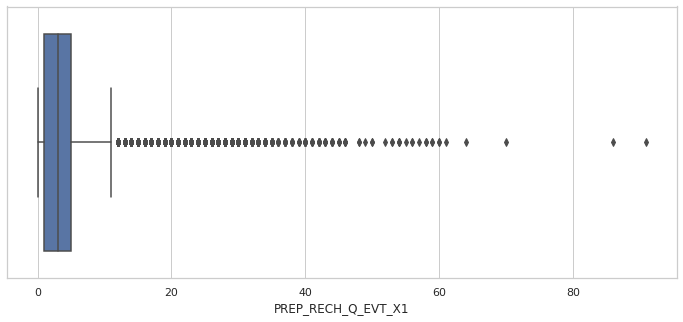

In [16]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_Q_EVT_X1"])

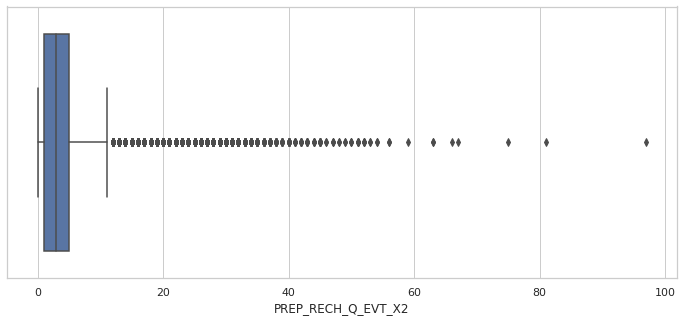

In [17]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_Q_EVT_X2"])

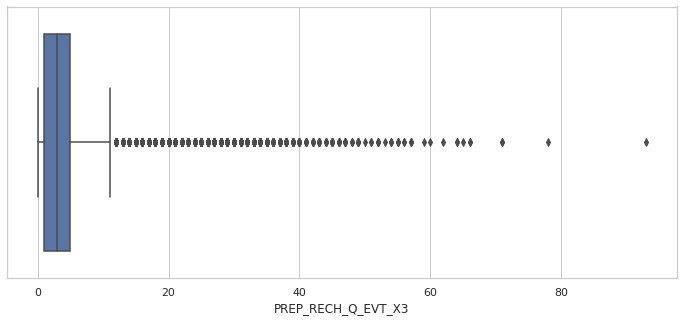

In [18]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_Q_EVT_X3"])

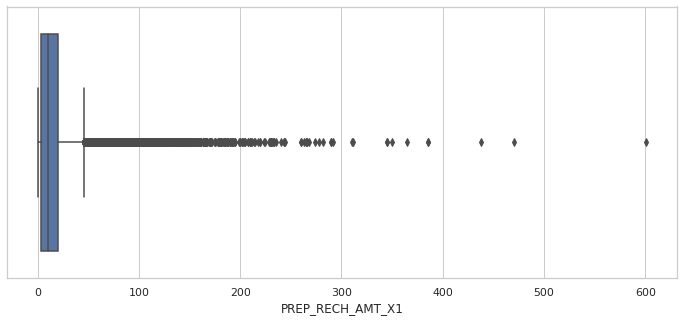

In [19]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_AMT_X1"])

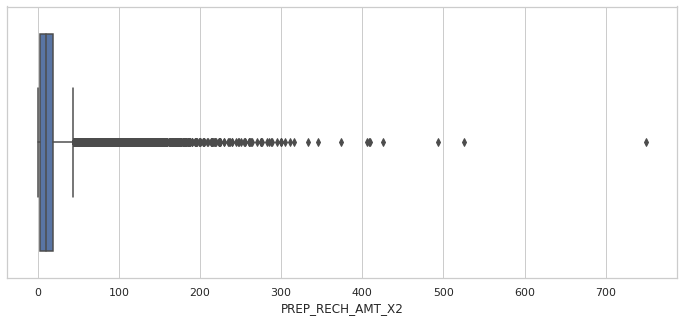

In [20]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_AMT_X2"])

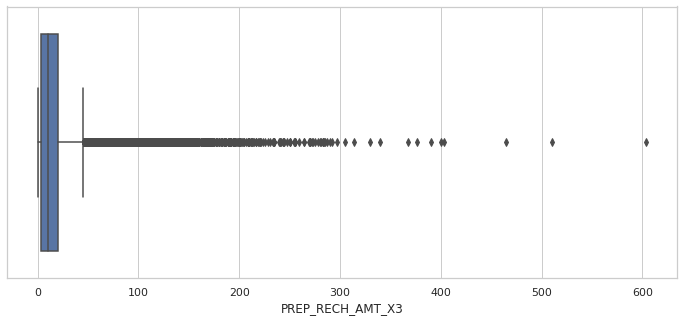

In [21]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PREP_RECH_AMT_X3"])

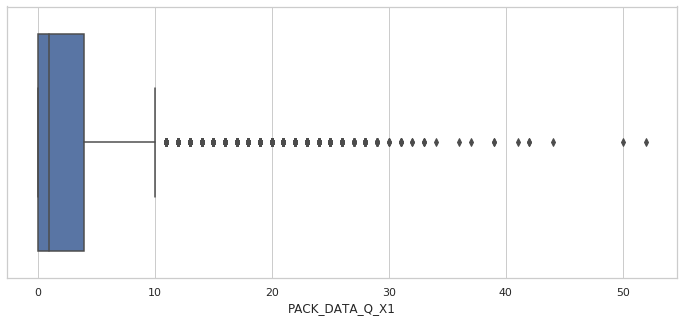

In [22]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_Q_X1"])

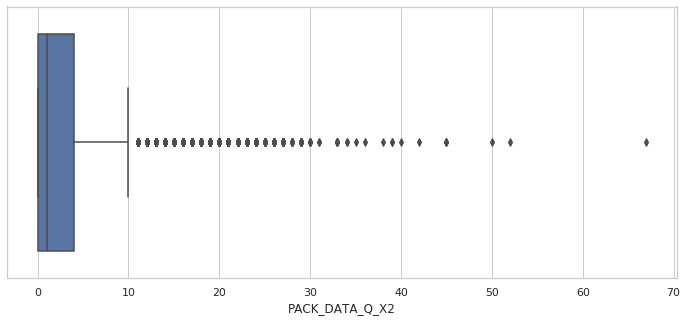

In [23]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_Q_X2"])

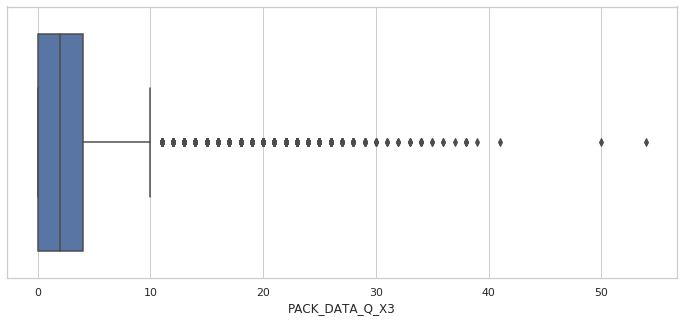

In [24]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_Q_X3"])

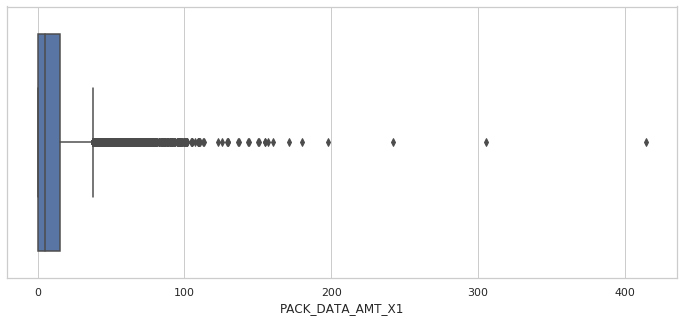

In [25]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_AMT_X1"])

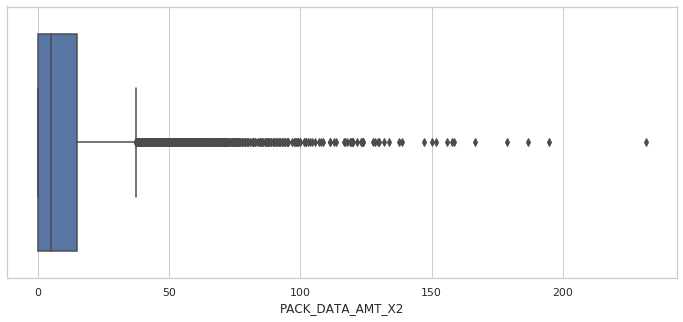

In [26]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_AMT_X2"])

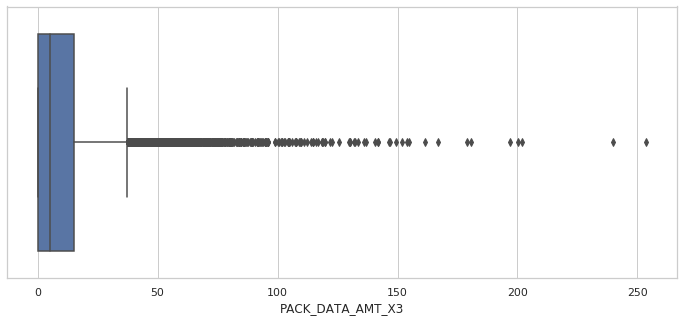

In [27]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_DATA_AMT_X3"])

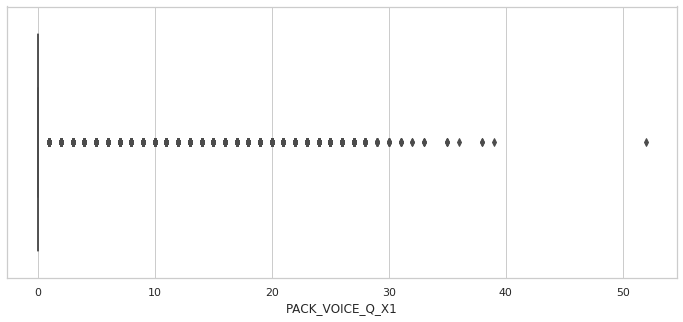

In [28]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_Q_X1"])

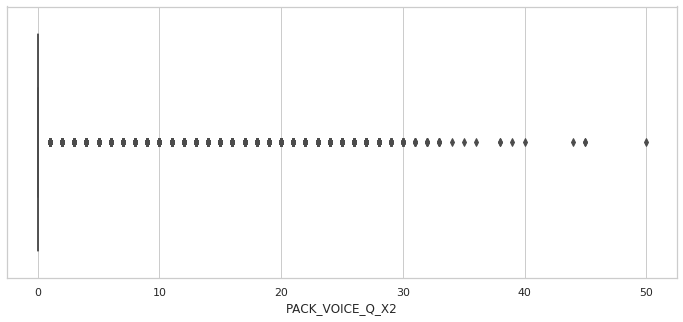

In [29]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_Q_X2"])

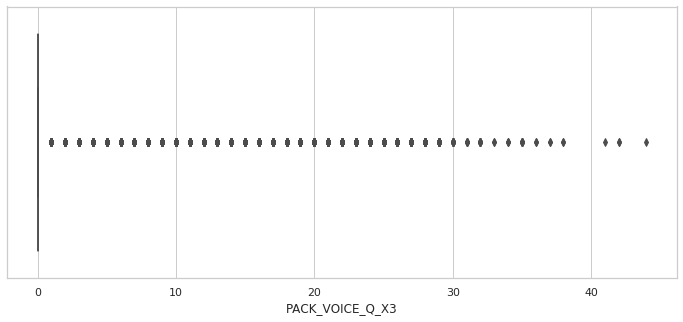

In [30]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_Q_X3"])

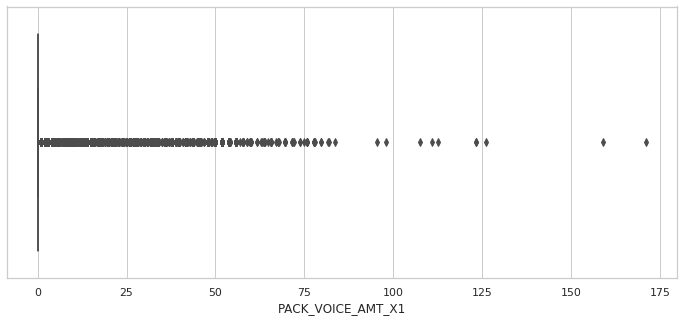

In [31]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_AMT_X1"])

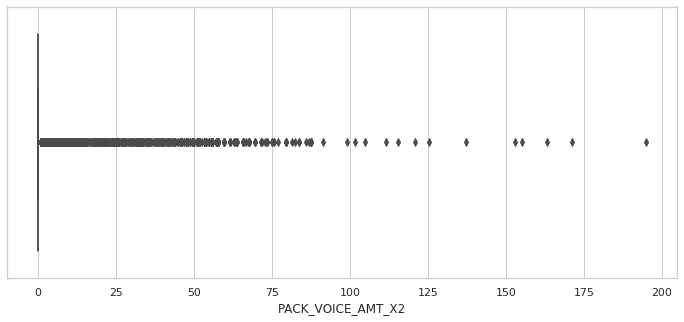

In [32]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_AMT_X2"])

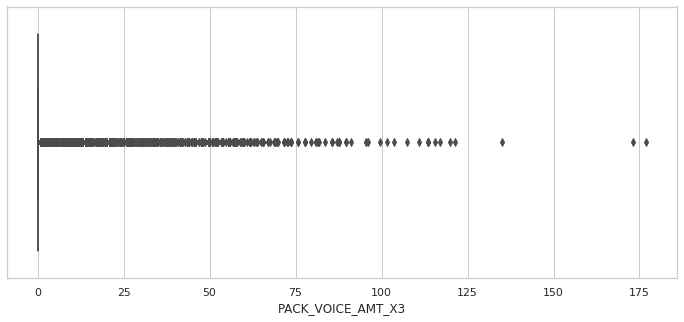

In [33]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_VOICE_AMT_X3"])

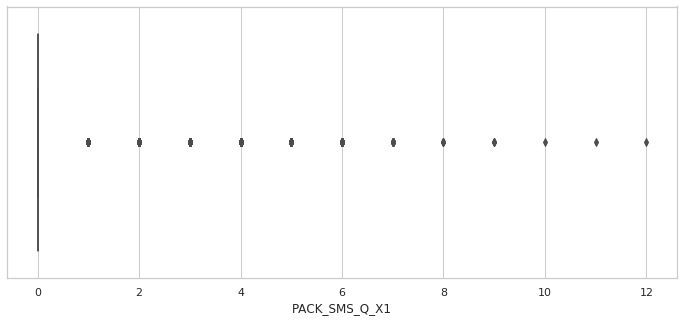

In [34]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_SMS_Q_X1"])

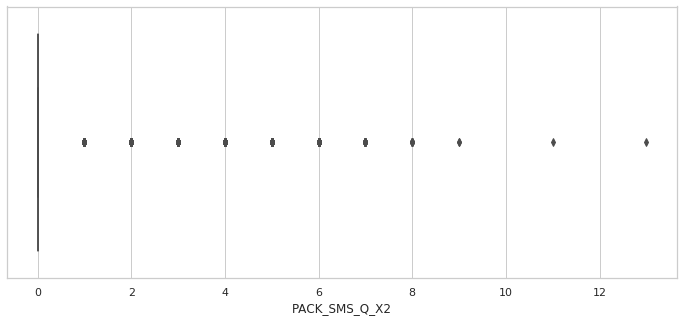

In [35]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_SMS_Q_X2"])

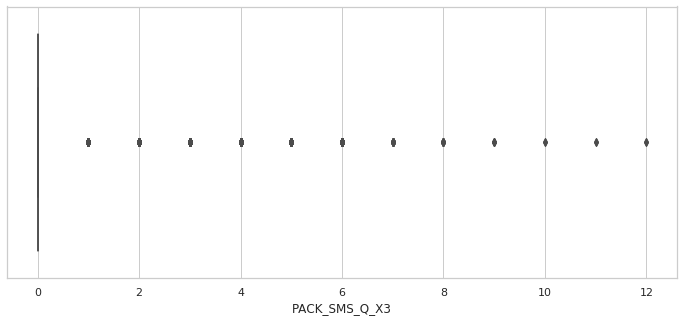

In [36]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_SMS_Q_X3"])

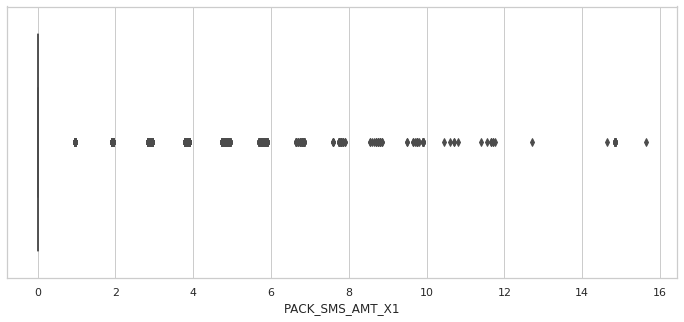

In [37]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_SMS_AMT_X1"])

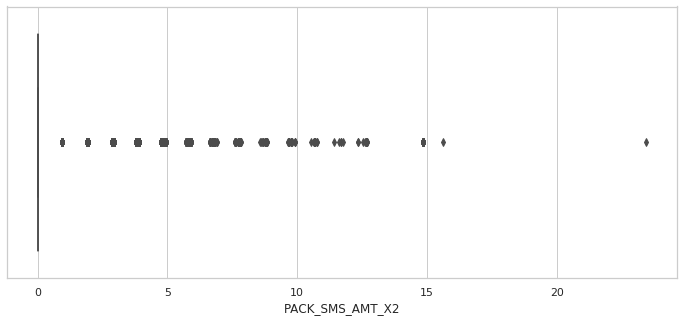

In [38]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_SMS_AMT_X2"])

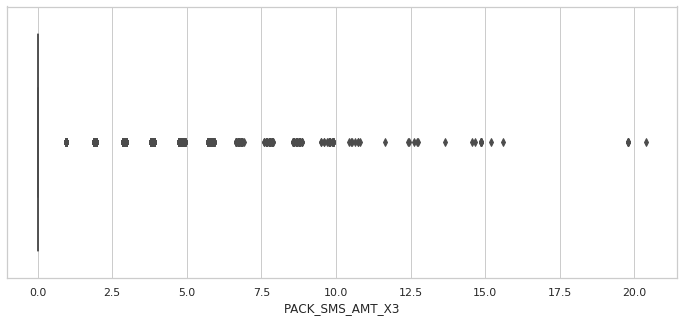

In [39]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(x=df["PACK_SMS_AMT_X3"])

In [ ]:
# conclusiones
# los outlieres se comportan de manera similar en cada campo, se va a tomar una decision generalizada
# para tratarlos

In [ ]:
# Voy a analizar las variables semanales
# Para ello voy a obtener las variables a trabajar

var_semanas = re.findall("\S*W[0-9]+"," ".join(df.columns.to_list()))

var_dias = re.findall("\S*Q\S*[0-9]+W"," ".join(df.columns.to_list()))

In [ ]:
# el analisis de ourlierts de estas variables no se muestra porque es muy similar a analisis de 
# outliers anterior

#### Correlaciones entre variables 

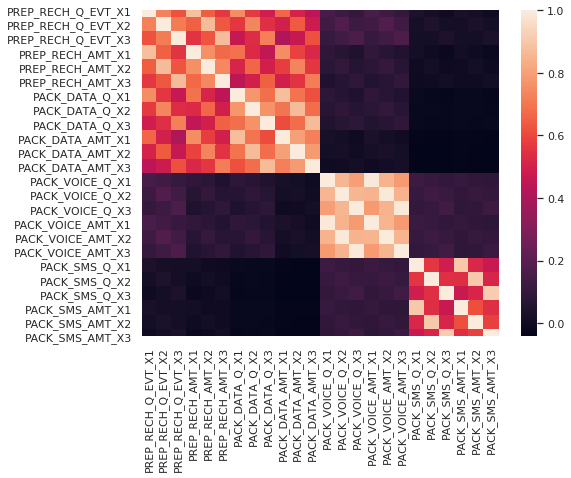

In [44]:
#variables mensuales, relacion entre ellas

plt.figure(figsize=(8,6))
sns.heatmap(df[var_meses].corr())

# vemos que hay correlacion entre la cantidad de eventos y el monto de cada una de las categorias (recargas,
# datos, pack de voz y pack de msj), por lo que vamos a tener que tomar acciones con este tema.

# existe una correlacion media entre las recargas y los datos, luego veremos en detalle ese tema

# con respecto a las demas relaciones entre recargas,datos,pack de voz y pack de msj no hay mucho para ver

In [56]:
# relacion entre variables de las recargas (mensuales, semanales , agrupadas por dia)
var_recargas = re.findall("\S*RECH\S*"," ".join(df.columns.to_list()))


['PREP_RECH_Q_EVT_X1',
 'PREP_RECH_Q_EVT_X2',
 'PREP_RECH_Q_EVT_X3',
 'PREP_RECH_AMT_X1',
 'PREP_RECH_AMT_X2',
 'PREP_RECH_AMT_X3',
 'PREP_RECH_Q_MON_12W',
 'PREP_RECH_Q_TUE_12W',
 'PREP_RECH_Q_WEN_12W',
 'PREP_RECH_Q_THUR_12W',
 'PREP_RECH_Q_FRI_12W',
 'PREP_RECH_Q_SAT_12W',
 'PREP_RECH_Q_SUN_12W',
 'PREP_RECH_LAST_DAY_12W',
 'PREP_RECH_NDAYS_LASTRECH_12W',
 'PREP_RECH_CHNNL_MODE12W',
 'PREP_RECH_Q_EVT_W1',
 'PREP_RECH_Q_EVT_W2',
 'PREP_RECH_Q_EVT_W3',
 'PREP_RECH_Q_EVT_W4',
 'PREP_RECH_Q_EVT_W5',
 'PREP_RECH_Q_EVT_W6',
 'PREP_RECH_Q_EVT_W7',
 'PREP_RECH_Q_EVT_W8',
 'PREP_RECH_Q_EVT_W9',
 'PREP_RECH_Q_EVT_W10',
 'PREP_RECH_Q_EVT_W11',
 'PREP_RECH_Q_EVT_W12',
 'PREP_RECH_AMT_W1',
 'PREP_RECH_AMT_W2',
 'PREP_RECH_AMT_W3',
 'PREP_RECH_AMT_W4',
 'PREP_RECH_AMT_W5',
 'PREP_RECH_AMT_W6',
 'PREP_RECH_AMT_W7',
 'PREP_RECH_AMT_W8',
 'PREP_RECH_AMT_W9',
 'PREP_RECH_AMT_W10',
 'PREP_RECH_AMT_W11',
 'PREP_RECH_AMT_W12']

In [57]:
# debemos quitar algunas columnas de la lista que no corresponden a eventos ni montos
# estas son 'PREP_RECH_LAST_DAY_12W','PREP_RECH_NDAYS_LASTRECH_12W','PREP_RECH_CHNNL_MODE12W'
# la variable 'PREP_RECH_NDAYS_LASTRECH_12W' indica los dias desde la ultima recarga, puede ser interesante su analisis
# procedemos a hacerlo mas adelante

var_recargas = [var for var in var_recargas if var not in ['PREP_RECH_LAST_DAY_12W','PREP_RECH_NDAYS_LASTRECH_12W','PREP_RECH_CHNNL_MODE12W']]
var_recargas

['PREP_RECH_Q_EVT_X1',
 'PREP_RECH_Q_EVT_X2',
 'PREP_RECH_Q_EVT_X3',
 'PREP_RECH_AMT_X1',
 'PREP_RECH_AMT_X2',
 'PREP_RECH_AMT_X3',
 'PREP_RECH_Q_MON_12W',
 'PREP_RECH_Q_TUE_12W',
 'PREP_RECH_Q_WEN_12W',
 'PREP_RECH_Q_THUR_12W',
 'PREP_RECH_Q_FRI_12W',
 'PREP_RECH_Q_SAT_12W',
 'PREP_RECH_Q_SUN_12W',
 'PREP_RECH_Q_EVT_W1',
 'PREP_RECH_Q_EVT_W2',
 'PREP_RECH_Q_EVT_W3',
 'PREP_RECH_Q_EVT_W4',
 'PREP_RECH_Q_EVT_W5',
 'PREP_RECH_Q_EVT_W6',
 'PREP_RECH_Q_EVT_W7',
 'PREP_RECH_Q_EVT_W8',
 'PREP_RECH_Q_EVT_W9',
 'PREP_RECH_Q_EVT_W10',
 'PREP_RECH_Q_EVT_W11',
 'PREP_RECH_Q_EVT_W12',
 'PREP_RECH_AMT_W1',
 'PREP_RECH_AMT_W2',
 'PREP_RECH_AMT_W3',
 'PREP_RECH_AMT_W4',
 'PREP_RECH_AMT_W5',
 'PREP_RECH_AMT_W6',
 'PREP_RECH_AMT_W7',
 'PREP_RECH_AMT_W8',
 'PREP_RECH_AMT_W9',
 'PREP_RECH_AMT_W10',
 'PREP_RECH_AMT_W11',
 'PREP_RECH_AMT_W12']

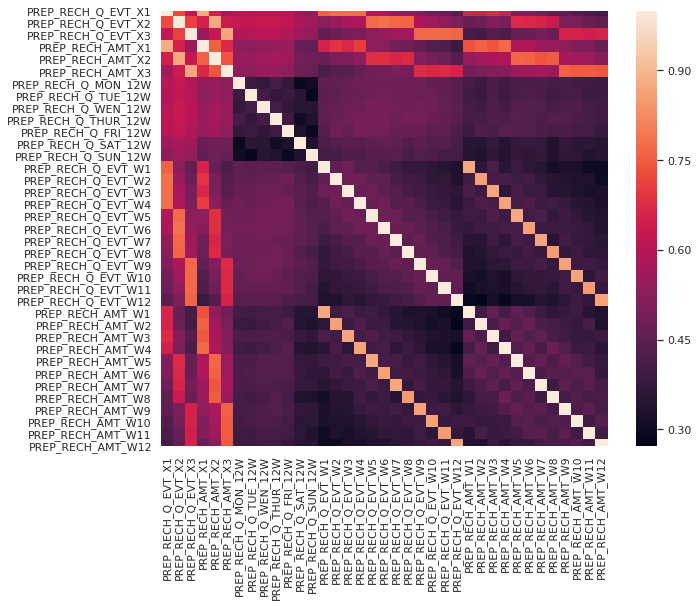

In [59]:
# heatmap de estos campos de recargas

plt.figure(figsize=(10,8))
sns.heatmap(df[var_recargas].corr())

In [61]:
# es complicado analizar, por lo que usaremos menos campos
# vamos a quitar los campos de los dias, nos quedamos solo con semanas y meses

var_recargas_reduc = re.findall("\S*[WX][0-9]+"," ".join(var_recargas))
var_recargas_reduc

['PREP_RECH_Q_EVT_X1',
 'PREP_RECH_Q_EVT_X2',
 'PREP_RECH_Q_EVT_X3',
 'PREP_RECH_AMT_X1',
 'PREP_RECH_AMT_X2',
 'PREP_RECH_AMT_X3',
 'PREP_RECH_Q_EVT_W1',
 'PREP_RECH_Q_EVT_W2',
 'PREP_RECH_Q_EVT_W3',
 'PREP_RECH_Q_EVT_W4',
 'PREP_RECH_Q_EVT_W5',
 'PREP_RECH_Q_EVT_W6',
 'PREP_RECH_Q_EVT_W7',
 'PREP_RECH_Q_EVT_W8',
 'PREP_RECH_Q_EVT_W9',
 'PREP_RECH_Q_EVT_W10',
 'PREP_RECH_Q_EVT_W11',
 'PREP_RECH_Q_EVT_W12',
 'PREP_RECH_AMT_W1',
 'PREP_RECH_AMT_W2',
 'PREP_RECH_AMT_W3',
 'PREP_RECH_AMT_W4',
 'PREP_RECH_AMT_W5',
 'PREP_RECH_AMT_W6',
 'PREP_RECH_AMT_W7',
 'PREP_RECH_AMT_W8',
 'PREP_RECH_AMT_W9',
 'PREP_RECH_AMT_W10',
 'PREP_RECH_AMT_W11',
 'PREP_RECH_AMT_W12']

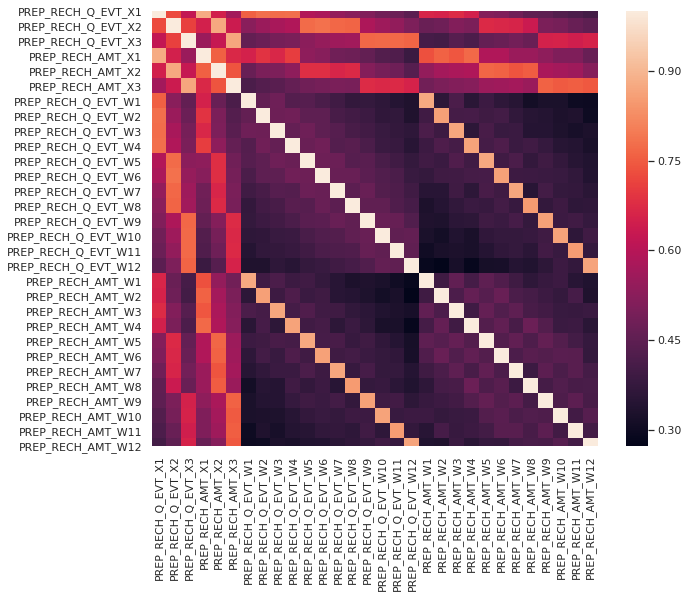

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df[var_recargas_reduc].corr())

# vemos que como era de esperar las variables semanales tienen un considerable grado de correlacion con las
# mensuales

In [67]:
# relacion entre variables de datos (mensuales, semanales)

var_datos = re.findall("\S*DATA_[QAMT]+_\S*"," ".join(df.columns.to_list()))
var_datos

['PACK_DATA_Q_X1',
 'PACK_DATA_Q_X2',
 'PACK_DATA_Q_X3',
 'PACK_DATA_AMT_X1',
 'PACK_DATA_AMT_X2',
 'PACK_DATA_AMT_X3',
 'PACK_DATA_Q_W1',
 'PACK_DATA_Q_W2',
 'PACK_DATA_Q_W3',
 'PACK_DATA_Q_W4',
 'PACK_DATA_Q_W5',
 'PACK_DATA_Q_W6',
 'PACK_DATA_Q_W7',
 'PACK_DATA_Q_W8',
 'PACK_DATA_Q_W9',
 'PACK_DATA_Q_W10',
 'PACK_DATA_Q_W11',
 'PACK_DATA_Q_W12',
 'PACK_DATA_AMT_W1',
 'PACK_DATA_AMT_W2',
 'PACK_DATA_AMT_W3',
 'PACK_DATA_AMT_W4',
 'PACK_DATA_AMT_W5',
 'PACK_DATA_AMT_W6',
 'PACK_DATA_AMT_W7',
 'PACK_DATA_AMT_W8',
 'PACK_DATA_AMT_W9',
 'PACK_DATA_AMT_W10',
 'PACK_DATA_AMT_W11',
 'PACK_DATA_AMT_W12']

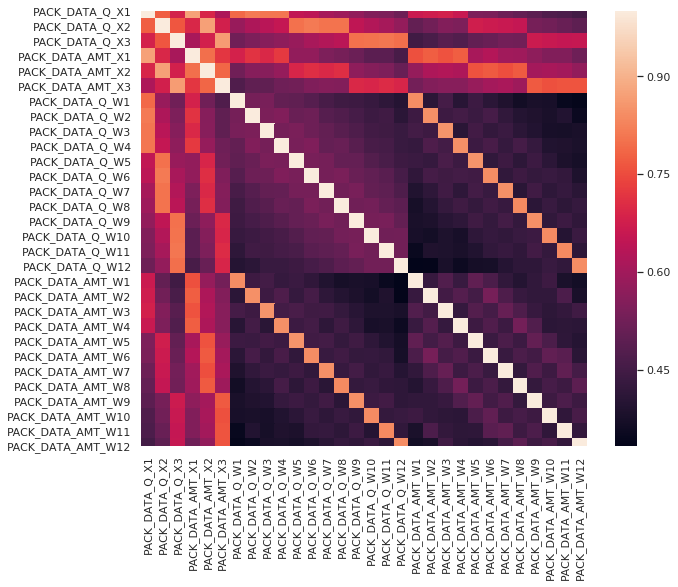

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df[var_datos].corr())

# vemos que como era de esperar las variables semanales tienen un considerable grado de correlacion con las
# mensuales

In [69]:
# relacion entre variables de los packs de voz (mensuales y semanales)
var_voz = re.findall("\S*VOICE\S*"," ".join(df.columns.to_list()))
var_voz

['PACK_VOICE_Q_X1',
 'PACK_VOICE_Q_X2',
 'PACK_VOICE_Q_X3',
 'PACK_VOICE_AMT_X1',
 'PACK_VOICE_AMT_X2',
 'PACK_VOICE_AMT_X3',
 'PACK_VOICE_Q_W1',
 'PACK_VOICE_Q_W2',
 'PACK_VOICE_Q_W3',
 'PACK_VOICE_Q_W4',
 'PACK_VOICE_Q_W5',
 'PACK_VOICE_Q_W6',
 'PACK_VOICE_Q_W7',
 'PACK_VOICE_Q_W8',
 'PACK_VOICE_Q_W9',
 'PACK_VOICE_Q_W10',
 'PACK_VOICE_Q_W11',
 'PACK_VOICE_Q_W12',
 'PACK_VOICE_AMT_W1',
 'PACK_VOICE_AMT_W2',
 'PACK_VOICE_AMT_W3',
 'PACK_VOICE_AMT_W4',
 'PACK_VOICE_AMT_W5',
 'PACK_VOICE_AMT_W6',
 'PACK_VOICE_AMT_W7',
 'PACK_VOICE_AMT_W8',
 'PACK_VOICE_AMT_W9',
 'PACK_VOICE_AMT_W10',
 'PACK_VOICE_AMT_W11',
 'PACK_VOICE_AMT_W12']

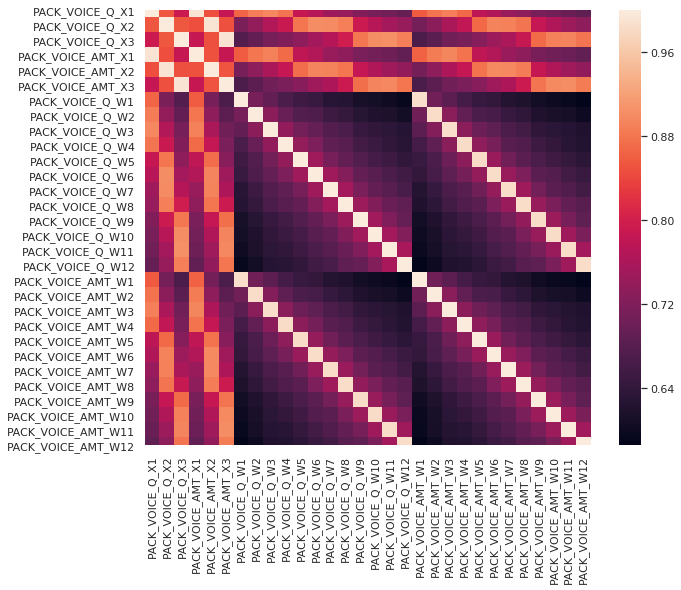

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df[var_voz].corr())

# vemos que como era de esperar las variables semanales tienen un considerable grado de correlacion con las
# mensuales

In [72]:
# relacion entre variables de los packs de sms (mensuales, semanales , agrupadas por dia)
var_sms = re.findall("P\S*SMS\S*"," ".join(df.columns.to_list()))
var_sms

# hay variables de trafico de msj que pueden ser utiles
# estos son los campos 'TRS_ONNET_SMS_M1','TRS_ONNET_SMS_M2','TRS_ONNET_SMS_M3','TRS_OFFNET_SMS_M1',
# 'TRS_OFFNET_SMS_M2','TRS_OFFNET_SMS_M3'

['PACK_SMS_Q_X1',
 'PACK_SMS_Q_X2',
 'PACK_SMS_Q_X3',
 'PACK_SMS_AMT_X1',
 'PACK_SMS_AMT_X2',
 'PACK_SMS_AMT_X3',
 'PACK_SMS_Q_W1',
 'PACK_SMS_Q_W2',
 'PACK_SMS_Q_W3',
 'PACK_SMS_Q_W4',
 'PACK_SMS_Q_W5',
 'PACK_SMS_Q_W6',
 'PACK_SMS_Q_W7',
 'PACK_SMS_Q_W8',
 'PACK_SMS_Q_W9',
 'PACK_SMS_Q_W10',
 'PACK_SMS_Q_W11',
 'PACK_SMS_Q_W12',
 'PACK_SMS_AMT_W1',
 'PACK_SMS_AMT_W2',
 'PACK_SMS_AMT_W3',
 'PACK_SMS_AMT_W4',
 'PACK_SMS_AMT_W5',
 'PACK_SMS_AMT_W6',
 'PACK_SMS_AMT_W7',
 'PACK_SMS_AMT_W8',
 'PACK_SMS_AMT_W9',
 'PACK_SMS_AMT_W10',
 'PACK_SMS_AMT_W11',
 'PACK_SMS_AMT_W12']

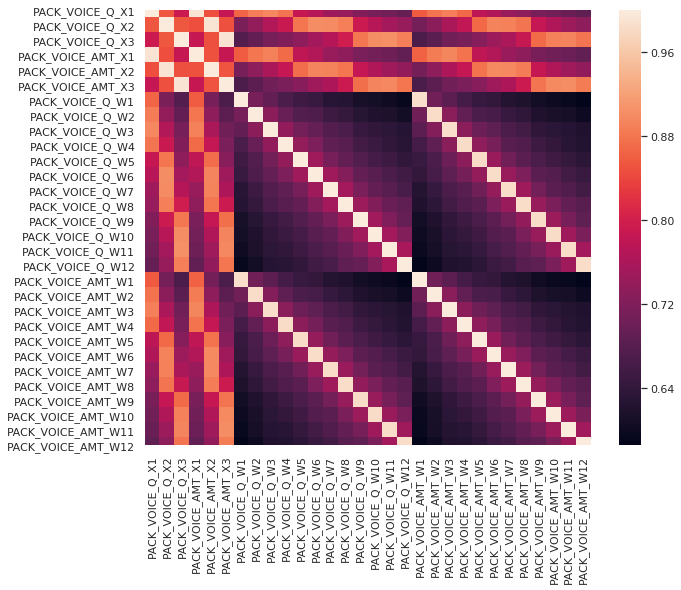

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(df[var_voz].corr())

# vemos que como era de esperar las variables semanales tienen un considerable grado de correlacion con las
# mensuales

In [ ]:
# conclusion
# como conclusion general vemos que las variables mensuales estan correlacionadas con las variables semanales
# vamos a tratar el tema a la hora de elegir que variables usar para el modelo